In [10]:
import pandas as pd
from keras.models import Sequential 
from keras.layers import Dense, Activation ,Dropout
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.regularizers import l1

In [11]:
data = pd.read_csv('trainingData.csv')
clean_data = data.drop(columns=['Id']).dropna()
clean_data.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0
5,Nuapada,23,F,OBC,General store,none,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [12]:
clean_data = pd.get_dummies(data.drop(columns=['Id']).dropna(), columns= ['city','sex','social_class','primary_business','secondary_business','type_of_house','loan_purpose'])
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(clean_data.loc[:,clean_data.columns != 'loan_amount'])
y = sc_y.fit_transform(clean_data.loc[:,clean_data.columns == 'loan_amount'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=42)

In [34]:
model= Sequential()
model.add(Dense(units=5,activation='relu',input_dim=X.shape[1],kernel_regularizer=l1(0.05)))
model.add(Dense(units=1))
model.compile(optimizer='rmsprop', loss='mean_squared_error')
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 5)                 7500      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
Total params: 7,506
Trainable params: 7,506
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
history = model.fit(x=X_train, y=y_train, epochs=10, validation_split=0.2, shuffle=False, verbose =0)

In [36]:
y_pred = model.predict(X_test)

In [16]:
def adj_r2(y_test,y_pred,p):
    r2 = r2_score(y_test,y_pred)
    n = y_test.shape[0]
    return 1-(1-r2)*(n-1)/(n-p-1)

MSE:2.0195, R2:0.0154 Adj R2:-0.1599


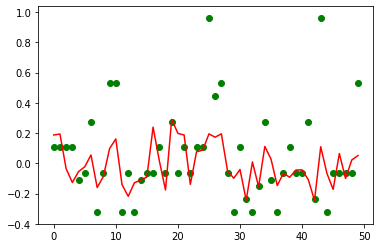

In [37]:
import matplotlib.pyplot as plt
print(f"MSE:{mean_squared_error(y_test,y_pred):.4f}, R2:{r2_score(y_test,y_pred):.4f} Adj R2:{adj_r2(y_test,y_pred, X_test.shape[1]):.4f}")
plt.scatter(range(50),y_test[0:50],color='g')
plt.plot(range(50),y_pred[0:50],color='r')

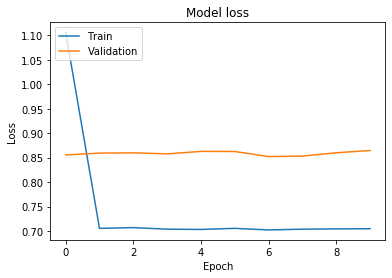

In [38]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()